In [1]:
import os
import h5py
import numpy as np

data_path = '/home/chengxuz/barrel/barrel_github/dataset/hdf5s/'

In [2]:
fin_test = h5py.File(os.path.join(data_path, 'duck_-102484264253777546.hdf5'), 'r')

In [3]:
fin_test.keys()

[u'Data_force', u'Data_torque', u'orn', u'position', u'scale', u'speed']

In [4]:
data_force = fin_test['Data_force']

In [5]:
data_force.shape

(110, 31, 3, 3)

In [6]:
from sklearn import svm

In [11]:
data_force.size

30690

In [13]:
arr_data_force = np.asarray(data_force)

In [14]:
arr_data_force = arr_data_force.reshape(arr_data_force.size)

In [15]:
arr_data_force.shape

(30690,)

In [17]:
test_arr = np.concatenate([arr_data_force, arr_data_force])

In [18]:
test_arr.shape

(61380,)

In [44]:
def get_asarray(dataset):
    ret_arr = np.asarray(dataset)
    ret_arr = ret_arr.reshape(ret_arr.size)
    return ret_arr

def get_data(data_path):
    file_list = os.listdir(data_path)
    data_x = []
    data_y = []
    for file_name in file_list:
        obj_name = file_name.split('_')[0]
        if obj_name=='teddy':
            data_y.append(0)
        else:
            data_y.append(1)
        file_path = os.path.join(data_path, file_name)
        fin_tmp = h5py.File(file_path)
        data_force = get_asarray(fin_tmp['Data_force'])
        data_torque = get_asarray(fin_tmp['Data_torque'])
        data_x.append(np.concatenate([data_force, data_torque]))
        fin_tmp.close()
    
    return data_x, data_y

In [211]:
'''
def get_asarray_part(dataset):
    ret_arr = np.asarray(dataset)
    #print(ret_arr.shape)
    ret_arr = ret_arr[54:56, :, 0, :]
    ret_arr_new = np.zeros([2, 31])
    for i in xrange(2):
        for j in xrange(31):
            ret_arr_new[i][j] = np.sqrt(ret_arr[i][j][0]**2 + ret_arr[i][j][1]**2 + ret_arr[i][j][2]**2)
    #print(ret_arr.shape)
    ret_arr_new = ret_arr_new.reshape(ret_arr_new.size)
    #print(ret_arr.size)
    return ret_arr_new
'''

def get_asarray_part(dataset):
    ret_arr = np.asarray(dataset)
    #print(ret_arr.shape)
    ret_arr = ret_arr[54:56, :, 0, :]
    ret_arr_new = np.zeros([2, 31])
    for i in xrange(2):
        for j in xrange(31):
            ret_arr_new[i][j] = np.sqrt(ret_arr[i][j][0]**2 + ret_arr[i][j][1]**2 + ret_arr[i][j][2]**2)
    #print(ret_arr.shape)
    ret_arr_new = ret_arr_new.reshape(ret_arr_new.size)
    #print(ret_arr.size)
    return ret_arr_new

def get_data_part(data_path):
    file_list = os.listdir(data_path)
    data_x = []
    data_y = []
    for file_name in file_list:
        obj_name = file_name.split('_')[0]
        if obj_name=='teddy':
            data_y.append(0)
        else:
            data_y.append(1)
        file_path = os.path.join(data_path, file_name)
        fin_tmp = h5py.File(file_path)
        data_force = get_asarray_part(fin_tmp['Data_force'])
        #data_torque = get_asarray_part(fin_tmp['Data_torque'])
        #data_x.append(np.concatenate([data_force, data_torque]))
        data_x.append(data_force)
        fin_tmp.close()
        if len(data_x)>150:
            #break
            pass
    
    return data_x, data_y    

In [212]:
data_x_part, data_y_part = get_data_part(data_path)

In [213]:
data_x_part[1].size

62

In [214]:

clf = svm.LinearSVC(C=1, penalty='l1', dual=False)

In [215]:
clf.fit(data_x_part, data_y_part)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [216]:
pred_y_part = clf.predict(data_x_part)

In [217]:
sum(pred_y_part==data_y_part)*1.0/len(pred_y_part)

0.79513888888888884

In [200]:
107.0/151

0.7086092715231788

In [201]:
203.0/288

0.7048611111111112

In [ ]:
pred_y_part = clf.predict(data_x_part)

In [21]:
data_x, data_y = get_data(data_path)

In [22]:
len(data_x)

288

In [23]:
data_x[0].size

61380

In [24]:
clf = svm.SVC()

In [25]:
clf.fit(data_x, data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
pred_y = clf.predict(data_x)

In [27]:
sum(pred_y==data_y)

288

In [31]:
data_path_val = '/home/chengxuz/barrel/barrel_github/dataset/hdf5s_val/'
data_x_val, data_y_val = get_data(data_path_val)

In [32]:
pred_y_val = clf.predict(data_x_val)

In [33]:
sum(pred_y_val==data_y_val)

144

In [37]:
pred_y_val

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
new_clf = svm.SVC()

In [39]:
new_clf.fit(data_x_val, data_y_val)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
new_pred_y_val = new_clf.predict(data_x_val)

In [41]:
sum(new_pred_y_val==data_y_val)

288

In [42]:
new_pred_y = new_clf.predict(data_x)

In [43]:
new_pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [218]:
data_x_val_part, data_y_val_part = get_data_part(data_path_val)

In [219]:
pred_y_val_part = clf.predict(data_x_val_part)

In [220]:
sum(pred_y_val_part==data_y_val_part)*1.0/len(pred_y_val_part)

0.69791666666666663

In [221]:
sum(pred_y_val_part==data_y_val_part)*1.0

201.0

In [206]:
78.0/151

0.5165562913907285

In [207]:
174.0/288

0.6041666666666666

In [111]:
data_x_val_part[1]

array([  4.00475000e+01,   3.34628190e+02,   6.73758592e+01,
         3.85430594e+01,   2.13790803e+00,   7.55107337e+01,
         1.31004947e+03,   1.49493213e+03,   3.68221863e+02,
         4.64526574e+01,   1.56006565e+01,   2.18247862e+03,
         3.46885127e+03,   7.90016651e+03,   1.78264151e+03,
         3.24659061e+02,   1.64132058e+01,   1.46536139e-04,
         6.99867968e+03,   3.83203675e+03,   1.36408488e+03,
         5.81435689e+03,   6.15321847e+03,   1.99163091e+03,
         2.66671261e+01,   3.21827061e+03,   2.08224568e+03,
         2.42728900e+03,   2.24045354e+04,   5.00115444e+02,
         2.68320555e+03,   4.03558417e+01,   4.88451771e+02,
         6.19391989e+01,   3.85921725e+01,   2.16430893e+00,
         7.54481870e+01,   1.32567327e+03,   2.23468542e+03,
         6.78626212e+02,   3.41724162e+01,   1.56882734e+01,
         2.87941826e+03,   3.61028202e+03,   8.24282131e+03,
         9.01527932e+02,   3.07905497e+02,   5.98239202e+01,
         4.49598474e-04,

# With more data and more variations

In [222]:
data_path_new_name = '/mnt/data/chengxuz/barrel/hdf5s_new_name'
data_path_new_name_fix = '/mnt/data/chengxuz/barrel/hdf5s_new_name_fix'
pos_fix_list = [1, 12, 13, 14, 15, 16, 17, 18, 19]

In [238]:
pos_var_lists = [[0,4,5,6,7,8,9,10,11], [2,20,21,22,23,24,25,26,27], [3,28,29,30,31,32,33,34,35], [1,12,13,14,15,16,17,18,19]]
speed_var_lists = [[7,9,11,13],[0,2,4,6],[8,10,12],[1,3,5]]
orn_var_lists = [[0,1,2,3,4],[5,6,7,8,9],[10,11,12,13,14]]
scale_var_lists = [[0,2,4],[1,3,5]]

In [263]:
def get_file_name(pos_indx, speed_indx, orn_indx, scale_indx):
    # Get the file name of hdf5 using all indexes. As I make a mistake about positions, some special fixes are used
    if pos_indx in pos_fix_list:
        curr_data_path = data_path_new_name_fix
    else:
        curr_data_path = data_path_new_name
    
    suffix_now = "_%i_%i_%i_%i.hdf5" % (pos_indx, scale_indx, speed_indx, orn_indx)
    prefix_list = ['duck', 'teddy']
    file_list = [x + suffix_now for x in prefix_list]
    file_list = [os.path.join(curr_data_path, x) for x in file_list]
    file_list = filter(os.path.exists, file_list)
    return file_list

In [264]:
def get_file_name_from_list(pos_indx_list, speed_indx_list, orn_indx_list, scale_indx_list):
    ret_val = []
    for pos_indx in pos_indx_list:
        for speed_indx in speed_indx_list:
            for orn_indx in orn_indx_list:
                for scale_indx in scale_indx_list:
                    ret_val.extend(get_file_name(pos_indx, speed_indx, orn_indx, scale_indx))
    
    return ret_val

In [323]:
def get_list_from_flag(var_lists, some_flag):
    ret_list = []
    for the_indx, the_flag in enumerate(some_flag):
        if the_flag:
            ret_list.extend(var_lists[the_indx])
    return ret_list

def get_file_name_from_flag(pos_flag, speed_flag, orn_flag, scale_flag):
    pos_indx_list = get_list_from_flag(pos_var_lists, pos_flag)
    #print(pos_indx_list)
    speed_indx_list = get_list_from_flag(speed_var_lists, speed_flag)
    #print(speed_indx_list)
    orn_indx_list = get_list_from_flag(orn_var_lists, orn_flag)
    #print(orn_indx_list)
    scale_indx_list = get_list_from_flag(scale_var_lists, scale_flag)
    #print(scale_indx_list)
    
    return get_file_name_from_list(pos_indx_list, speed_indx_list, orn_indx_list, scale_indx_list)
    

In [266]:
def rename_files(data_path_now):
    file_list = os.listdir(data_path_now)
    now_status = 0
    for file_name in file_list:
        if now_status%500==0:
            print(now_status)
        split_list = file_name.split('_', 2)
        new_file_name = "%s_%s" % (split_list[0], split_list[2])
        file_name = os.path.join(data_path_now, file_name)
        new_file_name = os.path.join(data_path_now, new_file_name)
        cmd_run = "mv %s %s" % (file_name, new_file_name)
        #os.system(cmd_run)
        now_status = now_status + 1

In [267]:
#rename_files(data_path_new_name)
#rename_files(data_path_new_name_fix)

In [268]:
print(get_file_name(0,0,0,0))

['/mnt/data/chengxuz/barrel/hdf5s_new_name/duck_0_0_0_0.hdf5', '/mnt/data/chengxuz/barrel/hdf5s_new_name/teddy_0_0_0_0.hdf5']


In [320]:
test_file_list = get_file_name_from_flag([True, False, False, False], [True, False, False, False], [True, True, True], [True, True])
#test_file_list = get_file_name_from_flag([False, False, False, True], [False, False, False, True], [False, False, True], [False, True])
print(len(test_file_list))
print(test_file_list[0])

[0, 4, 5, 6, 7, 8, 9, 10, 11]
[7, 9, 11, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 2, 4, 1, 3, 5]
6480
/mnt/data/chengxuz/barrel/hdf5s_new_name/duck_0_0_7_0.hdf5


In [272]:
all_data_dict = {}

In [273]:
num_whis = 31

In [284]:
def cache_or_fetch(file_name, key_value, big_dict):
    if file_name in big_dict:
        if key_value in big_dict[file_name]:
            return big_dict[file_name][key_value]
    tmp_fin = h5py.File(file_name, 'r')
    tmp_array = np.asarray(tmp_fin[key_value])
    if file_name not in big_dict:
        big_dict[file_name] = {}
    big_dict[file_name][key_value] = tmp_array
    return tmp_array

def get_array_from_indx(big_array, indx_for_time, indx_for_unit, mag_flag):
    indx_time_sta, indx_time_end = indx_for_time
    indx_unit_sta, indx_unit_end = indx_for_unit
    shape_new = [indx_time_end - indx_time_sta, num_whis, indx_unit_end - indx_unit_sta]
    if not mag_flag:
        shape_new.append(3)
    ret_array = np.zeros(shape_new)
    if mag_flag:
        for indx_time in xrange(indx_time_sta, indx_time_end):
            for indx_whis in xrange(num_whis):
                for indx_unit in xrange(indx_unit_sta, indx_unit_end):
                    ret_array[indx_time - indx_time_sta, indx_whis, indx_unit - indx_unit_sta] = np.sqrt(big_array[indx_time, indx_whis, indx_unit, 0]**2 + 
                                                                         big_array[indx_time, indx_whis, indx_unit, 1]**2 + 
                                                                         big_array[indx_time, indx_whis, indx_unit, 2]**2)
    else:
        ret_array = big_array[indx_time_sta:indx_time_end, :, indx_unit_sta:indx_unit_end, :]
    
    ret_array = ret_array.reshape(ret_array.size)
    return ret_array

def get_array_from_file(file_name, indx_for_time, indx_for_unit, mag_flag):
    return 1 if 'duck' in file_name else 0 ,np.concatenate([get_array_from_indx(cache_or_fetch(file_name, 'Data_force', all_data_dict), indx_for_time, indx_for_unit, mag_flag),
                          get_array_from_indx(cache_or_fetch(file_name, 'Data_torque', all_data_dict), indx_for_time, indx_for_unit, mag_flag)])
    

In [287]:
test_label, test_array = get_array_from_file(test_file_list[-1], [50,60], [0,3], False)

0
(5580,)
/mnt/data/chengxuz/barrel/hdf5s_new_name/teddy_11_4_13_4.hdf5


In [289]:
def get_data_from_file_list(file_list, array_settings, sample_settings):
    data_x = []
    data_y = []
    if ('sample' in sample_settings) and (sample_settings['sample']):
        if 'seed' in sample_settings:
            np.random.seed(sample_settings['seed'])
        file_list = np.random.choice(file_list, sample_settings['sample_num'])
    for file_name in file_list:
        curr_label, curr_array = get_array_from_file(file_name, **array_settings)
        data_x.append(curr_array)
        data_y.append(curr_label)
    return data_x, data_y

In [232]:
def get_speed_list(mode=0):
    #return [[0,-12,0], [0, -10, 0], [0, -8, 0]]
    if mode==0:
        return [[0,-12,0], [0, -10, 0], [0, -8, 0]] 
    elif mode==1:
        return [[0,-12.5,0], [0, -10.5, 0], [0, -8.5, 0]] 
    elif mode==2:
        start_speed = -14 
        end_speed = -7

        ret_list = []

        for now_speed in np.arange(start_speed, end_speed):
            now_speed_list = [0, now_speed, 0]
            ret_list.append(now_speed_list)

        start_speed = -14.5
        end_speed = -7.5

        for now_speed in np.arange(start_speed, end_speed):
            now_speed_list = [0, now_speed, 0]
            ret_list.append(now_speed_list)

        return ret_list
    else:
        return [[0,-12,0], [0, -10, 0], [0, -8, 0]] 

In [233]:
get_speed_list(2)

[[0, -14, 0],
 [0, -13, 0],
 [0, -12, 0],
 [0, -11, 0],
 [0, -10, 0],
 [0, -9, 0],
 [0, -8, 0],
 [0, -14.5, 0],
 [0, -13.5, 0],
 [0, -12.5, 0],
 [0, -11.5, 0],
 [0, -10.5, 0],
 [0, -9.5, 0],
 [0, -8.5, 0]]

In [270]:
clf = svm.LinearSVC(C=1, penalty='l1', dual=False)

In [333]:
def svm_train_test(train_flags, test_flags, array_settings, sample_settings, verbose = True):
    train_file_list = get_file_name_from_flag(*train_flags)
    train_x, train_y = get_data_from_file_list(train_file_list, array_settings, sample_settings)
    if verbose:
        print('Train data loading finished!')
    clf = svm.LinearSVC(C=1, penalty='l1', dual=False)
    clf.fit(train_x, train_y)
    if verbose:
        print('SVM fitting finished!')
    pred_train_y = clf.predict(train_x)
    perform_train = sum(pred_train_y==train_y)*1.0/len(train_y)
    
    test_file_list = get_file_name_from_flag(*test_flags)
    test_x, test_y = get_data_from_file_list(test_file_list, array_settings, {})
    if verbose:
        print('Test data loading finished!')
    pred_test_y = clf.predict(test_x)
    perform_test = sum(pred_test_y==test_y)*1.0/len(test_y)
    
    return perform_train, perform_test

In [321]:
#train_flags = ([True, False, False, False], [True, False, False, False], [True, False, False], [True, False])
train_flags = ([True, False, False, False], [True, False, False, False], [True, True, True], [True, True])
#test_flags = ([False, True, False, False], [False, True, False, False], [False, True, False], [False, True])
test_flags = ([False, True, False, False], [False, True, False, False], [True, True, True], [True, True])
array_settings = {'indx_for_time': [50, 60], 'indx_for_unit': [0, 3], 'mag_flag': False}
sample_settings = {}
p1,p2 = svm_train_test(train_flags, test_flags, array_settings, sample_settings)

[0, 4, 5, 6, 7, 8, 9, 10, 11]
[7, 9, 11, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 2, 4, 1, 3, 5]
Train data loading finished!
SVM fitting finished!
[2, 20, 21, 22, 23, 24, 25, 26, 27]
[0, 2, 4, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 2, 4, 1, 3, 5]
Test data loading finished!


In [322]:
print(p1, p2)

(1.0, 0.93287037037037035)


## Figures for performances

In [298]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

In [341]:
def plot_list_results(x_list, y_list, x_label, y_label, title_now, with_error = False, error_list = None, extend = False):

    plt.figure()
    if not with_error:
        plt.plot(x_list, y_list)
    else:
        plt.errorbar(x_list, y_list, yerr=error_list)
    plt.gcf().set_size_inches(7.5, 4.5)
    label_fontsize = 15
    title_fontsize = 18
    ticks_fontsize = 12
    plt.xlabel(x_label, fontsize=label_fontsize)
    plt.ylabel(y_label, fontsize=label_fontsize)
    plt.title(title_now, fontsize=title_fontsize)
    pylab.xticks(fontsize=ticks_fontsize)
    pylab.yticks(fontsize=ticks_fontsize)
    if extend:
        plt.xlim([np.min(x_list) - 50, np.max(x_list) + 50])

100 0 1 2 3 4 5 6 7 8 9
500 0 1 2 3 4 5 6 7 8 9
1000 0 1 2 3 4 5 6 7 8 9
2000 0 1 2 3 4 5 6 7 8 9
3000 0 1 2 3 4 5 6 7 8 9
5000 0 1 2 3 4 5 6 7 8 9
6480 0 1 2 3 4 5 6 7 8 9


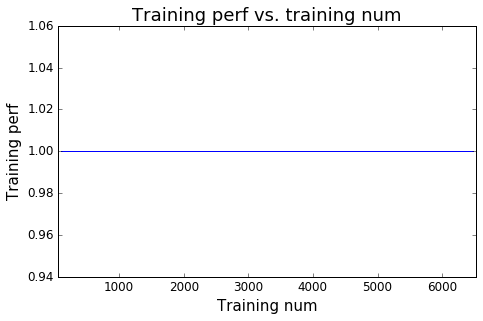

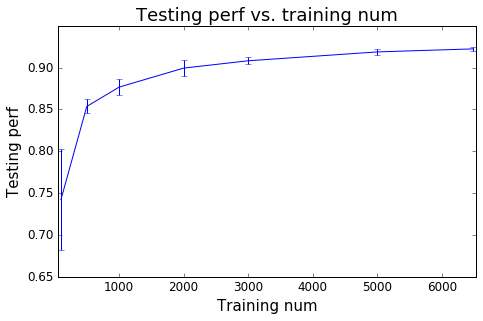

In [339]:
#train_flags = ([True, False, False, False], [True, False, False, False], [True, False, False], [True, False])
train_flags = ([True, False, False, False], [True, False, False, False], [True, True, True], [True, True])
#test_flags = ([False, True, False, False], [False, True, False, False], [False, True, False], [False, True])
test_flags = ([False, True, False, False], [False, True, False, False], [True, True, True], [True, True])
array_settings = {'indx_for_time': [50, 60], 'indx_for_unit': [0, 3], 'mag_flag': False}
sample_settings = {'sample': True, 'seed':0, 'sample_num': 1000}

sample_num_list = [100, 500, 1000, 2000, 3000, 5000, 6480]
#sample_num_list = [100, 500, 1000, ]

train_p_list = []
test_p_list = []
err_p_list = []

num_rand = 10

for sample_num in sample_num_list:
    sample_settings['sample_num'] = sample_num
    tmp_test_list = []
    print sample_num,
    for indx_rand in xrange(num_rand):
        print indx_rand,
        sample_settings['seed'] = indx_rand
        train_p,test_p = svm_train_test(train_flags, test_flags, array_settings, sample_settings, verbose=False)
        tmp_test_list.append(test_p)
        
    print
    train_p_list.append(train_p)
    test_p_list.append(np.mean(tmp_test_list))
    err_p_list.append(np.std(tmp_test_list))

plot_list_results(sample_num_list, train_p_list, 'Training num', 'Training perf', 'Training perf vs. training num')
plot_list_results(sample_num_list, test_p_list, 'Training num', 'Testing perf', 'Testing perf vs. training num', True, err_p_list, extend= True)

Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!


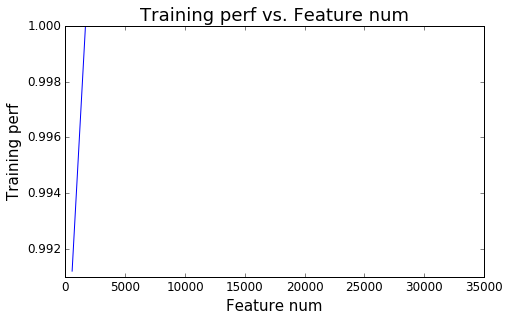

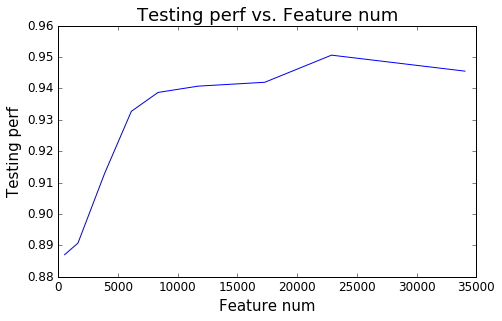

In [342]:
#train_flags = ([True, False, False, False], [True, False, False, False], [True, False, False], [True, False])
train_flags = ([True, False, False, False], [True, False, False, False], [True, True, True], [True, True])
#test_flags = ([False, True, False, False], [False, True, False, False], [False, True, False], [False, True])
test_flags = ([False, True, False, False], [False, True, False, False], [True, True, True], [True, True])
array_settings = {'indx_for_time': [50, 60], 'indx_for_unit': [0, 3], 'mag_flag': False}
#sample_settings = {'sample': True, 'seed':0, 'sample_num': 5000}
sample_settings = {}

indx_time_len_list = [0, 1, 3, 5, 7, 10, 15, 20, 30]
#indx_time_len_list = [0, 1, 3, 5]
x_list_for_fig = []

train_p_list = []
test_p_list = []

for indx_time_len in indx_time_len_list:
    array_settings['indx_for_time'] = [55 - indx_time_len, 55 + indx_time_len + 1]
    train_p,test_p = svm_train_test(train_flags, test_flags, array_settings, sample_settings)
    
    train_p_list.append(train_p)
    test_p_list.append(test_p)
    
    x_list_for_fig.append(31*3*6*(2*indx_time_len + 1))

plot_list_results(x_list_for_fig, train_p_list, 'Feature num', 'Training perf', 'Training perf vs. Feature num')
plot_list_results(x_list_for_fig, test_p_list, 'Feature num', 'Testing perf', 'Testing perf vs. Feature num')

Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!
Train data loading finished!
SVM fitting finished!
Test data loading finished!


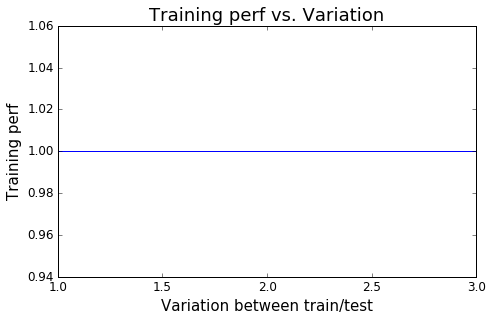

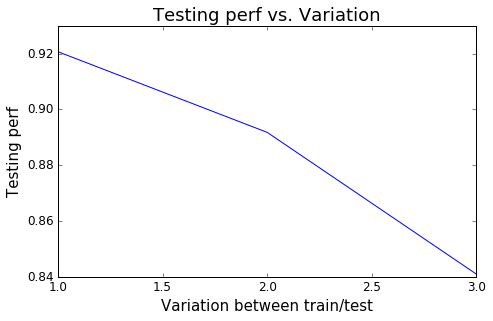

In [326]:
#train_flags = ([True, False, False, False], [True, False, False, False], [True, False, False], [True, False])
train_flags = ([True, False, False, False], [True, False, False, False], [True, True, True], [True, True])
#test_flags = ([False, True, False, False], [False, True, False, False], [False, True, False], [False, True])
test_flags = ([False, True, False, False], [False, True, False, False], [True, True, True], [True, True])
array_settings = {'indx_for_time': [50, 60], 'indx_for_unit': [0, 3], 'mag_flag': False}
#sample_settings = {'sample': True, 'seed':0, 'sample_num': 5000}
sample_settings = {}

x_list = [1,2,3]

train_p_list = []
test_p_list = []

train_p,test_p = svm_train_test(train_flags, test_flags, array_settings, sample_settings)
train_p_list.append(train_p)
test_p_list.append(test_p)

test_flags = ([False, False, True, False], [False, False, True, False], [True, True, True], [True, True])
train_p,test_p = svm_train_test(train_flags, test_flags, array_settings, sample_settings)
train_p_list.append(train_p)
test_p_list.append(test_p)

test_flags = ([False, False, False, True], [False, False, False, True], [True, True, True], [True, True])
train_p,test_p = svm_train_test(train_flags, test_flags, array_settings, sample_settings)
train_p_list.append(train_p)
test_p_list.append(test_p)

plot_list_results(x_list, train_p_list, 'Variation between train/test', 'Training perf', 'Training perf vs. Variation')
plot_list_results(x_list, test_p_list, 'Variation between train/test', 'Testing perf', 'Testing perf vs. Variation')

## Example images and videos

In [343]:
import matplotlib.image as mpimg

In [348]:
def show_image(file_name):
    img=mpimg.imread(file_name)
    plt.imshow(img)
    plt.gcf().set_size_inches(10.5, 10.5)    
    plt.axis('off')

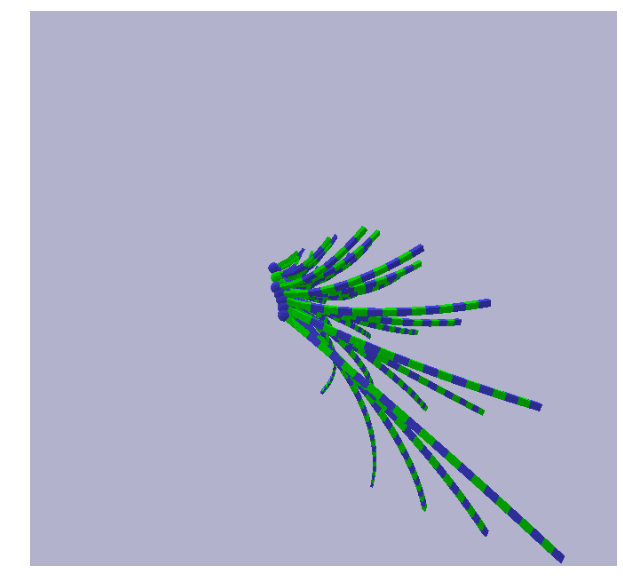

In [349]:
show_image('whisker_array_0.png')

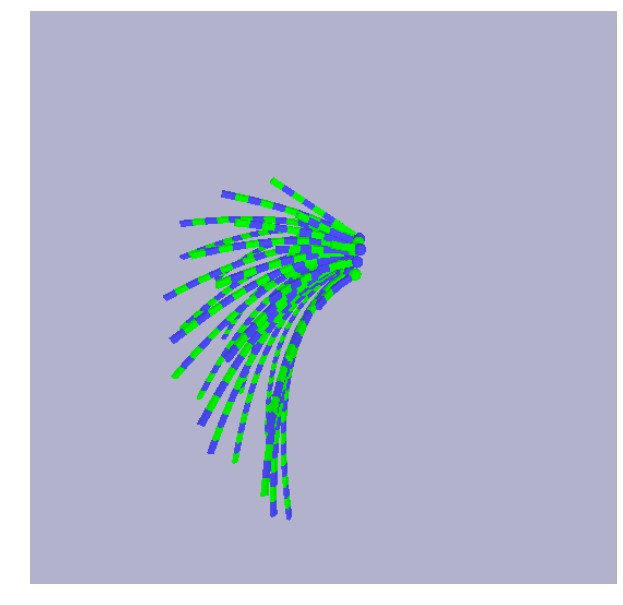

In [350]:
show_image('whisker_array_1.png')

In [351]:
import io
import base64
from IPython.display import HTML

In [355]:
file_name = 'example_forcemode_0.mp4'

video = io.open(file_name, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))